## PS 5

Plot experimental sigma from C=1 to 1000000.

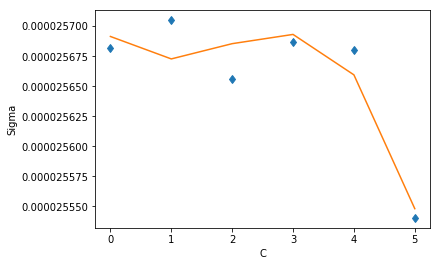

2.55404234973e-05


In [23]:
import numpy as np
from numpy.polynomial import Polynomial as P
#import plotly
#import plotly.plotly as py
#import plotly.figure_factory as ff
import matplotlib.pyplot as plt
#Integrand function
def f(x,H):
    #return (x-5)*np.exp(-(x/2-3))+H
    return np.sin(x)/x +H
#Calculates the coefficients of linear weight function.    
def findw(f,H,lower,upper,normalize):
    #Find the linear function.
    slope=(f(upper,H)-f(lower,H))/(upper-lower)
    a=slope
    b=-slope*upper+f(upper,H)
    #Normalization.
    A=(a/2)*(upper**2)+b*upper-(a/2)*(lower**2)-b*lower
    if normalize:
        a/=A
        b/=A
    return [a,b]
#Performs integration.
def integrate(f,lower,upper,N,C):
    H=C
    w=findw(f,H,lower,upper,True)    
    #Generate uniform random inputs.
    inputs=np.random.rand(N)    
    a=w[0]/2  
    b=w[1]
    c=-(a*lower**2+b*lower)
    
    SUM=0
    SUM2=0
    
    inverse_inputs=[]
    for i in inputs:
        p=[(-b-np.sqrt(b**2-4*a*(c-i)))/(2*a),(-b+np.sqrt(b**2-4*a*(c-i)))/(2*a)]
        if p[0]>=lower and p[0]<=upper:
            inverse_inputs.append(p[0])
        else :
            inverse_inputs.append(p[1])

    inverse_inputs=np.array(inverse_inputs)
    #Calculate f(inverse(x))/w(inverse(x)).
    outputsF=f(inverse_inputs,H)
    outputsW=w[0]*(inverse_inputs)+w[1]
    outputs=outputsF/outputsW
    SUM=outputs.sum()
    SUM2=(outputs*outputs).sum()
    var=SUM2/N-(SUM/N)**2
    var=var/N
    #Store generated points for variance calculation.
    Vsum=outputs.sum()
    return Vsum/N-H*(upper-lower),(upper-lower)**2*var
    
sigmas=[]
sigma=0
I=0
l=[4.6,5.2]
C=np.arange(0,6,1)
for c in C:
    I=0
    sigma=0
    temp_sigmas=[]
    temp_results=[]
    for i in range (0,len(l)-1):
        for p in range (0,100):
            temp,temp2=integrate(f,l[i],l[i+1],1000,10**c)
            temp_sigmas.append(temp2)
            temp_results.append(temp)
        sigma+=np.mean(temp_sigmas)
        I+=np.mean(temp_results)
    sigmas.append(np.sqrt(sigma))

plt.plot(C,sigmas,'d')
plt.ylabel('Sigma')
plt.xlabel('C')
z = np.polyfit(C,sigmas,3)
p = np.poly1d(z)
plt.plot(C,p(C))
plt.show()
print(np.min(sigmas))


Plot analytical sigma from C=1 to 1000000.

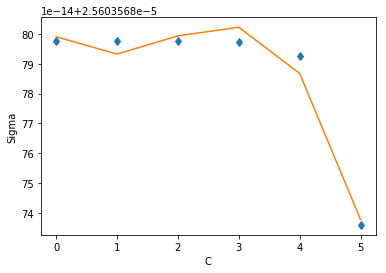

Min value: 2.5603568736e-05


In [16]:
def theoretical_sigma(f,lower,upper,N,C):
    
    w=findw(f,C,lower,upper,True) 
    
    flower=f(lower,C)
    fmiddle=f((lower+upper)/2,C)
    fupper=f(upper,C)
    
    wlower=w[0]*lower+w[1]
    wmiddle=w[0]*(lower+upper)/2+w[1]
    wupper=w[0]*upper+w[1]
    
    gupper=fupper/wupper
    gmiddle=fmiddle/wmiddle
    glower=flower/wlower    

    
    sigma=np.abs(0.03727*(upper-lower)**3/np.sqrt(N)*(4*(gupper-2*gmiddle+glower)/(upper-lower)**2))
    
    
    #return (upper-lower)*np.sqrt(var)
    return sigma

low=4.6
high=5.2
C=np.arange(0,6,1)
sigmas=[]
for i in C:
    sigmas.append(theoretical_sigma(f,low,high,1000,10**i))
    
    
plt.plot(C,sigmas,'d')
plt.ylabel('Sigma')
plt.xlabel('C')
z = np.polyfit(C,sigmas,3)
p = np.poly1d(z)
plt.plot(C,p(C))
plt.show()

#print(theoretical_sigma(f,low,high,1000,int(-f(low,0)/2-f(high,0)/2)))
#print(-f(low,0)/2-f(high,0)/2)
print("Min value:",np.min(sigmas))


## Minimum Sigma

We found that sigma is proportional to $g(a)+g(b)-2g(\frac{a+b}{2})$. Taking derivative of this value with respect to C and equating to 0, we get

$$\frac{dg(a)}{dC}+\frac{dg(b)}{dC}-2\frac{dg(\frac{a+b}{2})}{dC}$$ where

$$g(x)=\frac{f(x)+C}{kw}$$.
Note that in the previous derivation I denote k.w by simply w for simplification.

Also,
$$w(x)=f(a)+\frac{f(b)-f(a)}{b-a}(x-a)+C$$ and 
$$\frac{1}{k}=\frac{\left(f(b)-f(a)\right)(b^2-a^2)}{2(b-a)}+\left(f(b)-b\frac{f(b)-f(a)}{b-a}+C\right)(b-a)$$

Then,

$$g(x)=\frac{(f(x)+C)\left(\frac{(f(b)-f(a))(b^2-a^2)}{2(b-a)}+\left(f(b)-b\frac{f(b)-f(a)}{b-a}+C\right)(b-a)\right)}{f(a)+\frac{f(b)-f(a)}{b-a}(x-a)+C}$$

From here,

$$g(a)=\frac{(f(b)-f(a)(b^2-a^2)}{2(b-a)}+\left(f(b)-b\frac{f(b)-f(a)}{b-a}+C\right)(b-a)$$

$$g(b)=\frac{(f(b)-f(a)(b^2-a^2)}{2(b-a)}+\left(f(b)-b\frac{f(b)-f(a)}{b-a}+C\right)(b-a)$$

$$g(\frac{a+b}{2})=\frac{(f(\frac{a+b}{2})+C)\left(\frac{(f(b)-f(a))(b^2-a^2)}{2(b-a)}+\left(f(b)-b\frac{f(b)-f(a)}{b-a}+C\right)(b-a)\right)}{\frac{f(a)+f(b)}{2}+C}  $$

$$\frac{dg(a)}{dC}=b-a$$
$$\frac{dg(b)}{dC}=b-a$$

It follows that $\frac{dg(\frac{a+b}{2})}{dC}$ should be equal to $b-a$.

MATLAB gives the following solution,

$$C=\frac{f(a)+f(b)}{-2}$$ 
with the condition $f(a)+f(b)\simeq 0$ 


In [13]:
print(theoretical_sigma(f,low,high,1000,int(-f(low,0)/2-f(high,0)/2)))

2.56035687975e-05
